In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Moniruzzman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('updatejob.csv')

In [4]:
df.head()

,job_title,company,job_location,job_skills,job_salary,category,plain_experience
0,Python Support Hero (Intern),NaN,Dhaka,Python,8000-12000,Developer\n,.
1,Senior Wordpress Developer,NaN,Sylhet,WordPress,100k,Developer,relevant field
2,Diploma in Engineering (civil),NaN,"54, Siddeshwari road",Diploma in Civil,15000,Engineer,3 to 6 year(s)
3,Senior Software Engineer (iOS),NaN,Mohakhali,NaN,Negotiable,Developer,relevant field
4,Intern,NaN,Anywhere in the country,.,Not Mentioned,Business,.


In [5]:
pd.isnull(df).sum()

job_title            0
company              5
job_location         0
job_skills          21
job_salary           2
category             1
plain_experience     0
dtype: int64

In [6]:
df = df.dropna(how='any',axis='rows')

In [7]:
df.company.value_counts()

IPDC Finance Limited    13
DaffodilPolytechnic     13
BJIT                     7
TwinBit Limited          6
Pride Group              4
                        ..
ExpressITbd              1
Coding                   1
Omicon                   1
playense                 1
cretechbd                1
Name: company, Length: 120, dtype: int64

In [8]:
df.job_location.value_counts()[:10]

Dhaka                              93
Anywhere in Bangladesh             23
Dhanmondi                           7
dhaka                               6
Dhaka (Gulshan)                     4
Anywhere in Bangladesh (online)     4
Mirpur DOHS                         4
Pragati Sarani                      4
Dhaka (Banani)                      3
Shahajadpur                         3
Name: job_location, dtype: int64

In [9]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

df['category'] = df.category.apply(lambda x: word_tokenize(x))
df['category'] = df.category.apply(lambda x: [w for w in x if w not in stop_words])
df['category'] = df.category.apply(lambda x: ' '.join(x))

df['job_skills'] = df.job_skills.apply(lambda x: word_tokenize(x))
df['job_skills'] = df.job_skills.apply(lambda x: [w for w in x if w not in stop_words])
df['job_skills'] = df.job_skills.apply(lambda x: ' '.join(x))

df['plain_experience'] = df.plain_experience.apply(lambda x: word_tokenize(x))
df['plain_experience'] = df.plain_experience.apply(lambda x: [w for w in x if w not in stop_words])
df['plain_experience'] = df.plain_experience.apply(lambda x: ' '.join(x))

In [10]:
df.category.value_counts()[:10]

Developer     39
Executive     22
Manager       20
Engineer      17
Instructor    14
Designer      13
Sales          9
Officer        7
Marketing      6
HR             5
Name: category, dtype: int64

In [11]:
pd.set_option('display.max_colwidth', -1)
df.head(1)

<ipython-input-11-176f38559c2f>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,job_title,company,job_location,job_skills,job_salary,category,plain_experience
5,"Designer, Men's Wear, Design",aarong,Dhaka,"style , fashion , fabric , color technical aspects",Negotiable,Designer,relevant field


In [12]:
df['category'].unique()

array(['Designer', 'Sales', 'Officer', 'Developer', 'Engineer', 'Writer',
       'Intern', 'Manager', 'Assistant', 'Bussiness', 'Magento 2',
       'innovative', 'Merchandiser', 'Analyst', 'Management', 'Executive',
       'SEO Expert & Content writer', 'Programmer', 'Marketing',
       'Content writer .', 'Instructor', 'Health', 'Representative',
       'Maintenance', 'Supervision', 'HR', 'Business', '.',
       'Administration', 'Audit', 'Billing', 'Histopathologist',
       'Relationship', 'Commercial', 'Accounts', 'CFO', 'Trainee',
       'Nutrition Associate', 'SEO expert', 'Network', 'IT', 'Database',
       'Design', 'Cashier', 'Executive .', 'Administrator',
       'Autoclave/ Boiler operator', 'Software', 'career',
       'System Associate', 'SEO Expert', 'Circuit & System Design',
       '3DArtists', 'construction'], dtype=object)

In [13]:
df['job_skills'].unique()

array(['style , fashion , fabric , color technical aspects',
       'Presentation Skills , Client Relationships , Emphasizing Excellence , Energy Level , Negotiation , Prospecting Skills , Meeting Sales Goals , Creativity , Sales Planning , Independence , Motivation Sales',
       '.',
       'ASP DOT NET CORE/ASP DOT NET , ASP DOT NET Core MSSQL ServerPostgreSQL , Framework MVC-6 least . Web Services , WCF , SOAP .',
       'Metal Firmware , AudioToolbox , CocoaPods .', 'test tools',
       'Forum posting , blog posting , blog commenting',
       'AVFoundation , Metal Firmware , AudioToolbox , iOS mobile software',
       'Hard Working , Presentation Skill , Software Development',
       'Adobe Illustrator , Photoshop , Figma , Adobe Xd',
       'Digital , Social Media Operation , Advertisement , Marketing',
       'communication , interpersonal , leadership',
       'Auto CAD,3D Presentation , BOQ',
       'PHP , MySQL , NodeJS , VueJS , React , Ajax , jQuery , JavaScript , HTML , CS

In [14]:
Degree = ['Developer','Marketing','Executive','Engineer','Designer','Manager','Sales']

Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df['category'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'Developer': 39, 'Marketing': 6, 'Executive': 23, 'Engineer': 17, 'Designer': 13, 'Manager': 20, 'Sales': 9}


In [15]:
degree_requirement = sorted(Degrees.items(), key=lambda x: x[1], reverse=True)
degree = pd.DataFrame(degree_requirement,columns=['Category','Count'])
degree['Count'] = degree.Count.astype('int')
degree

,Category,Count
0,Developer,39
1,Executive,23
2,Manager,20
3,Engineer,17
4,Designer,13
5,Sales,9
6,Marketing,6


Text(0.5, 0, 'Count')

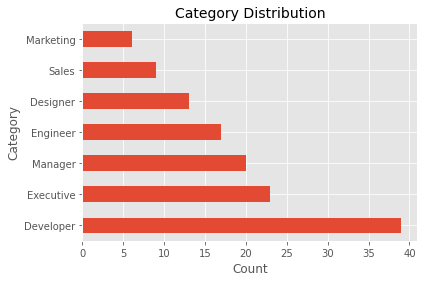

In [16]:
degree.plot.barh(x='Category',y='Count',legend=False)
plt.title('Category Distribution',fontsize=14)
plt.xlabel('Count')

Text(0.5, 0.98, 'Experience')

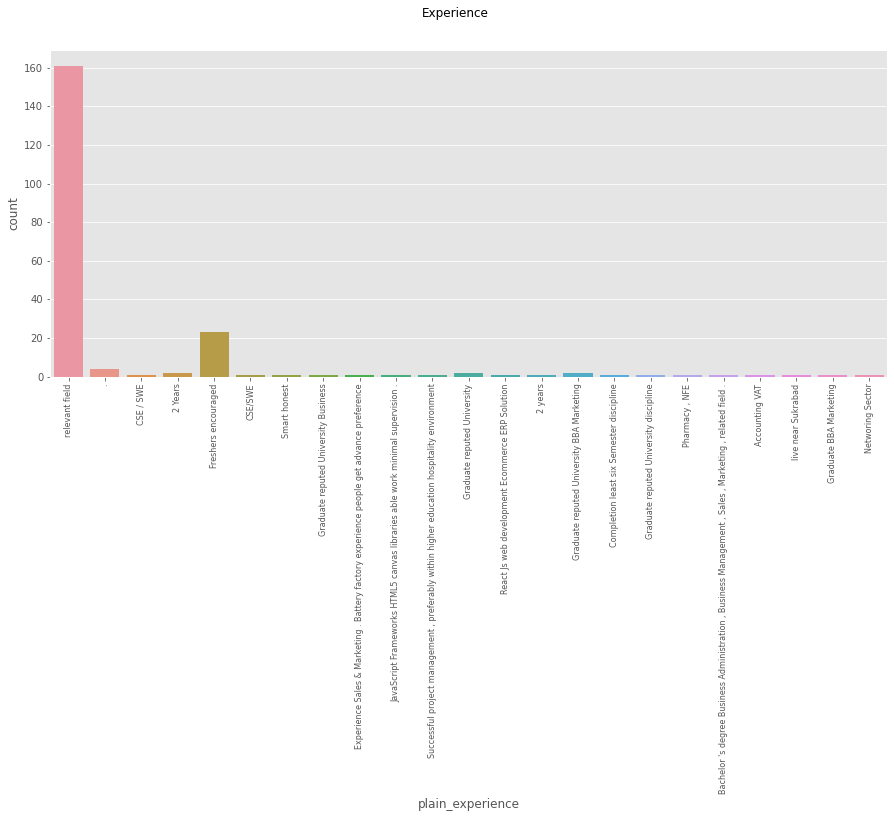

In [17]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot('plain_experience',data=df)
plt.xticks(rotation="vertical",size=8)
plt.suptitle('Experience')

In [18]:
Programming_Languages = ['Python', 'Java ','ASP.NET', 'PHP', 'Javascript', 'AJAX ', 'Bootstrap', 'SQL','React JS','Vue.js','Angular']

Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df['job_skills'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

{'Python': 1, 'Java ': 7, 'ASP.NET': 2, 'PHP': 7, 'Javascript': 3, 'AJAX ': 4, 'Bootstrap': 5, 'SQL': 10, 'React JS': 1, 'Vue.js': 1, 'Angular': 2}


In [19]:
languages_requirement = sorted(Languages.items(), key=lambda x: x[1], reverse=True)
language = pd.DataFrame(languages_requirement,columns=['Language','Count'])
language['Count'] = language.Count.astype('int')
language

,Language,Count
0,SQL,10
1,Java,7
2,PHP,7
3,Bootstrap,5
4,AJAX,4
5,Javascript,3
6,ASP.NET,2
7,Angular,2
8,Python,1
9,React JS,1


Text(0.5, 0, 'Count')

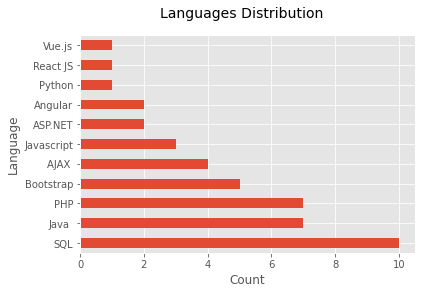

In [20]:
language.plot.barh(x='Language',y='Count',legend=False)
plt.suptitle('Languages Distribution',fontsize=14)
plt.xlabel('Count')

In [21]:
pip install wordcloud

In [22]:
def MadeWordCloud(job_title,text):
    df_subset = df.loc[df.job_title.str.contains(job_title).fillna(False)]
    long_text = ' '.join(df_subset[text].tolist())
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    wordcloud = WordCloud(mask=G,background_color="white").generate(long_text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title(text,size=24)
    plt.show()

In [23]:
df_developer = df.loc[df.job_title.str.contains('Developer').fillna(False)]

In [24]:
df_developer.job_location.value_counts()

Dhaka                              9
Mirpur DOHS                        3
Mohammadpur                        2
Shahajadpur                        2
Paltan                             2
Anywhere in Bangladesh             2
Pragati Sarani                     2
Anywhere in Bangladesh (online)    2
Uttara                             1
Dhaka (Adabor)                     1
Badda                              1
Narayanganj, Dhaka                 1
Japan                              1
Mohakhali                          1
Dhaka (Mirpur)                     1
DOHS Mirpur                        1
Dhanmondi                          1
Narayangonj                        1
Dhaka (Hatirpul)                   1
Dhaka (Paltan)                     1
Name: job_location, dtype: int64

In [25]:
Res_AN = ' '.join(df_developer['category'].tolist())

In [26]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

G = np.array(Image.open('1.png'))

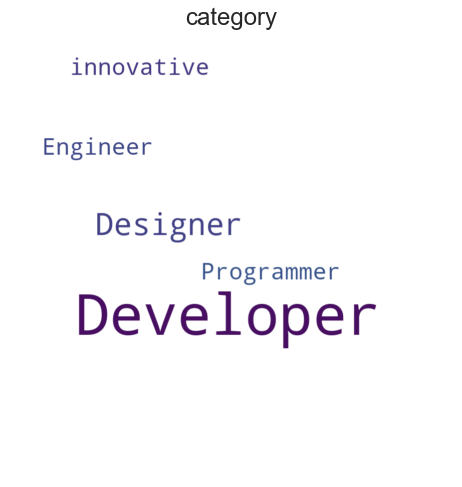

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(mask=G,background_color="white").generate(Res_AN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('category',size=24)
plt.show()

In [28]:
df_skill = df.loc[df.job_skills.str.contains('Java').fillna(False)]

In [29]:
Res_AN1 = ' '.join(df_skill['job_skills'].tolist())

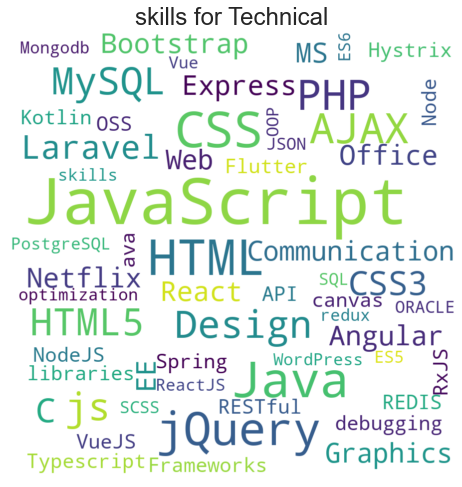

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(mask=G,background_color="white").generate(Res_AN1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('skills for Technical',size=24)
plt.show()

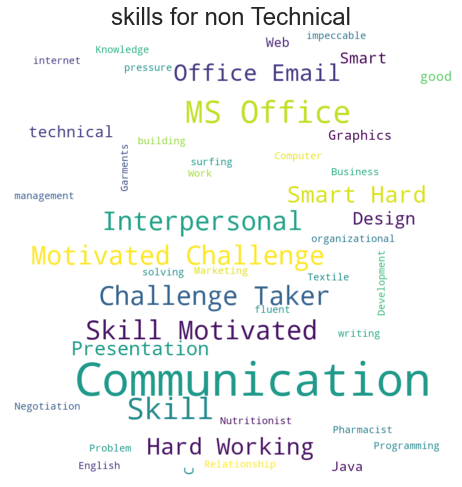

In [31]:
df_skill = df.loc[df.job_skills.str.contains('Communication').fillna(False)]
Res_AN2 = ' '.join(df_skill['job_skills'].tolist())
sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(mask=G,background_color="white").generate(Res_AN2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('skills for non Technical',size=24)
plt.show()

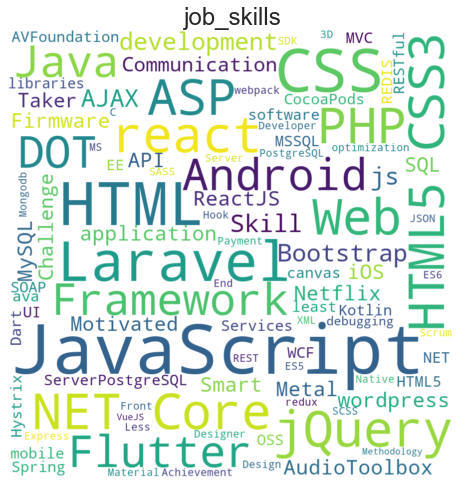

In [32]:
MadeWordCloud('Developer','job_skills')

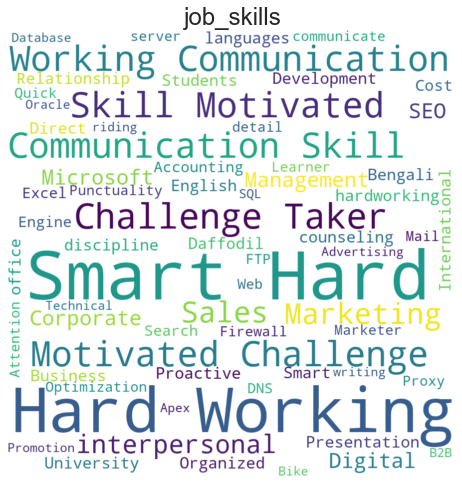

In [33]:
MadeWordCloud('Executive','job_skills')

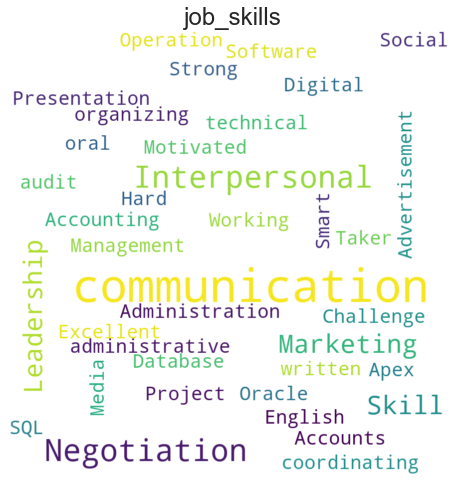

In [34]:
MadeWordCloud('Manager','job_skills')

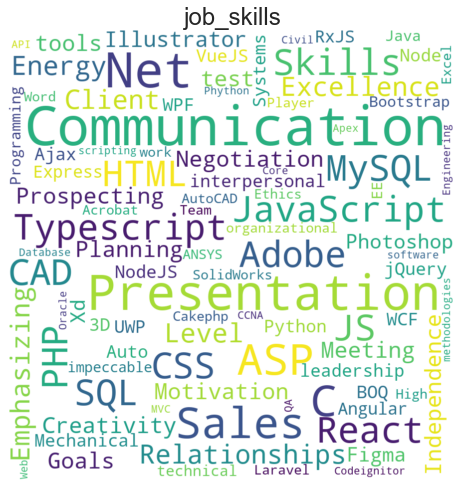

In [35]:
MadeWordCloud('Engineer','job_skills')

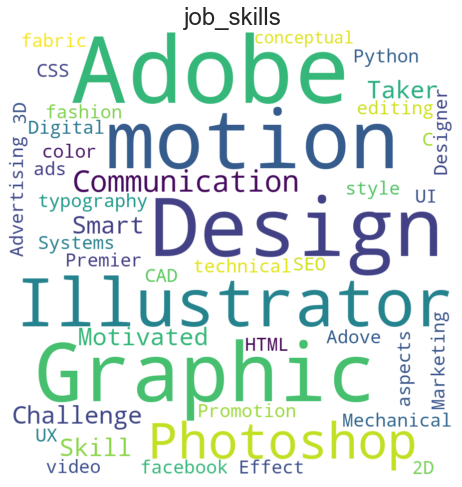

In [36]:
MadeWordCloud('Designer','job_skills')

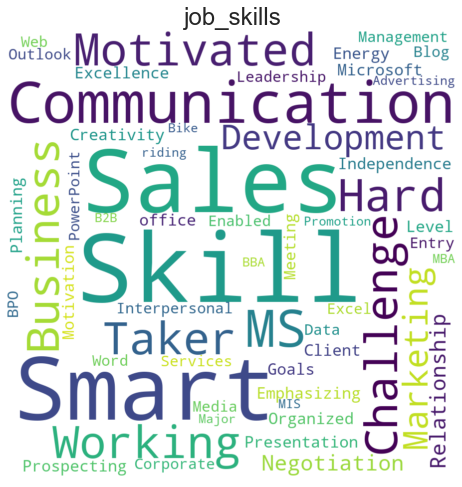

In [37]:
MadeWordCloud('Sales ','job_skills')

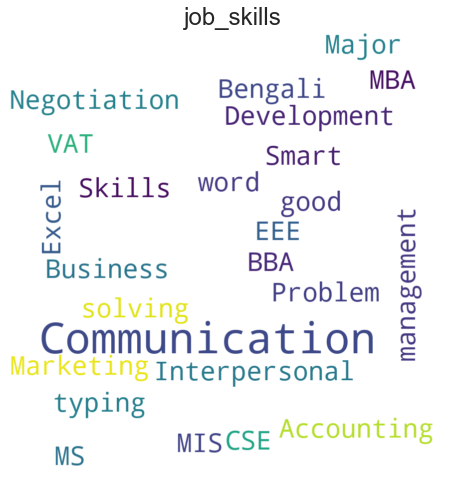

In [38]:
MadeWordCloud('Officer','job_skills')

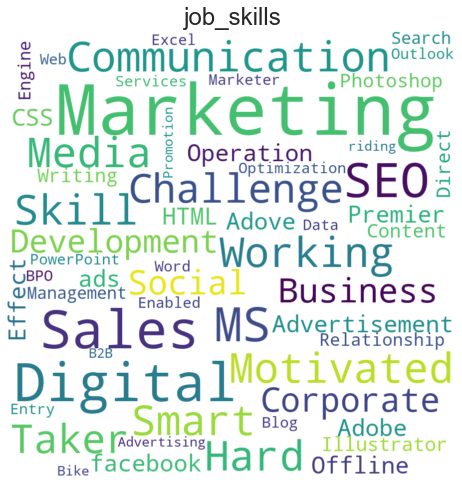

In [39]:
MadeWordCloud('Marketing','job_skills')

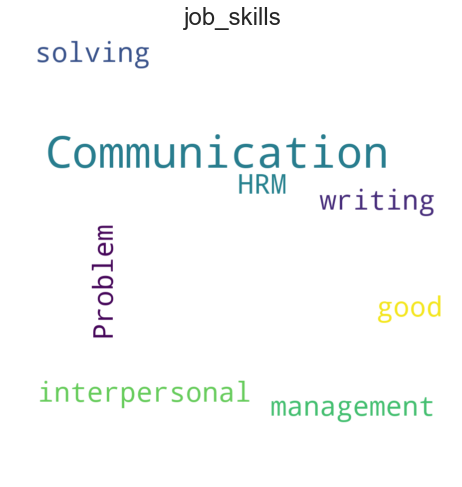

In [40]:
MadeWordCloud('HR','job_skills')

# Developer

In [41]:
grp = df.groupby('category') 
developer=grp.get_group('Developer')
developer.head(10)


,job_title,company,job_location,job_skills,job_salary,category,plain_experience
8,ASP .NET Developer (Full Stack),Alphasoft,DOHS Mirpur,"ASP DOT NET CORE/ASP DOT NET , ASP DOT NET Core MSSQL ServerPostgreSQL , Framework MVC-6 least . Web Services , WCF , SOAP .",Negotiable,Developer,relevant field
10,Senior iOS Developer,appnap,Pragati Sarani,"Metal Firmware , AudioToolbox , CocoaPods .",Negotiable,Developer,relevant field
13,Junior iOS Developer,appnap,Pragati Sarani,"AVFoundation , Metal Firmware , AudioToolbox , iOS mobile software",Negotiable,Developer,relevant field
16,Full Stack Developer (Mid/Senior),AyooJon,Dhaka,.,Negotiable,Developer,relevant field
22,Android Apps Developer,BBD,"Narayanganj, Dhaka","Java , Kotlin , Flutter .",Negotiable,Developer,2 Years
23,Digital Marketing/ Offline Marketing,BBD,"Narayanganj, Dhaka","SEO , Social Media Marketing , Offline Marketing .",15000-30000,Developer,2 Years
31,Full Stack Software Engineer (Web & Cloud),BJIT,dhaka,"Node.js , Express , Angular 2+ , Typescript , RxJS , JavaScript , Bootstrap",Negotiable,Developer,relevant field
35,Laravel Developer,BOB,Narayangonj,Laravel / PHP Framework,Negotiable,Developer,CSE/SWE
37,Senior Android Developer,Brain,Mohakhali,Android application development,Negotiable,Developer,relevant field
53,Laravel Developer (Intern),cretechbd,Mohammadpur,"PHP 5+ , jQuery , JavaScript , AJAX , HTML5 , CSS3 .",Unpaid,Developer,relevant field


In [42]:
Programming_Languages = ['js','c+', 'Java ','React','Laravel', 'PHP', 'Javascript', 'AJAX ', 'Bootstrap', 'SQL','HTML5','Vue','Angular','jQuery',]

Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = developer['job_skills'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

{'js': 5, 'c+': 24, 'Java ': 2, 'React': 3, 'Laravel': 5, 'PHP': 5, 'Javascript': 2, 'AJAX ': 4, 'Bootstrap': 4, 'SQL': 5, 'HTML5': 4, 'Vue': 2, 'Angular': 2, 'jQuery': 3}


In [43]:
languages_requirement = sorted(Languages.items(), key=lambda x: x[1], reverse=True)
language = pd.DataFrame(languages_requirement,columns=['Language','Count'])
language['Count'] = language.Count.astype('int')
language

,Language,Count
0,c+,24
1,js,5
2,Laravel,5
3,PHP,5
4,SQL,5
5,AJAX,4
6,Bootstrap,4
7,HTML5,4
8,React,3
9,jQuery,3


Text(0.5, 0, 'Count')

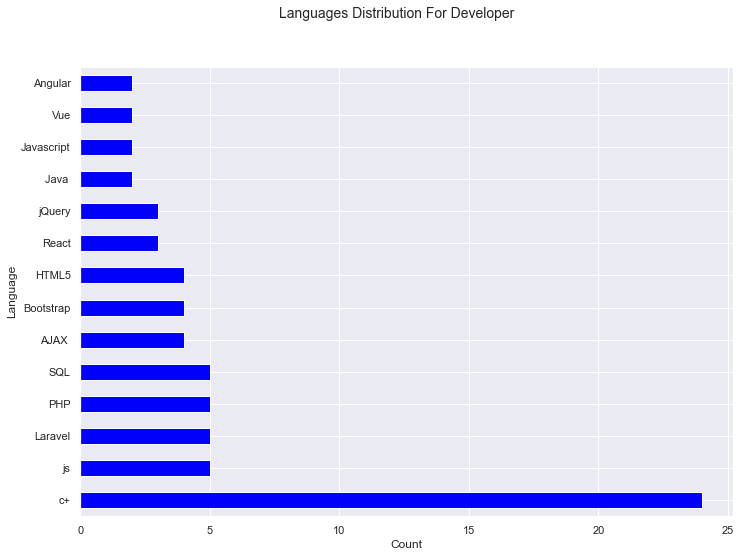

In [44]:
language.plot.barh(x='Language',y='Count',legend=False ,color='blue')
plt.suptitle('Languages Distribution For Developer',fontsize=14)
plt.xlabel('Count')

Text(0.5, 0.98, 'Salary For Developer')

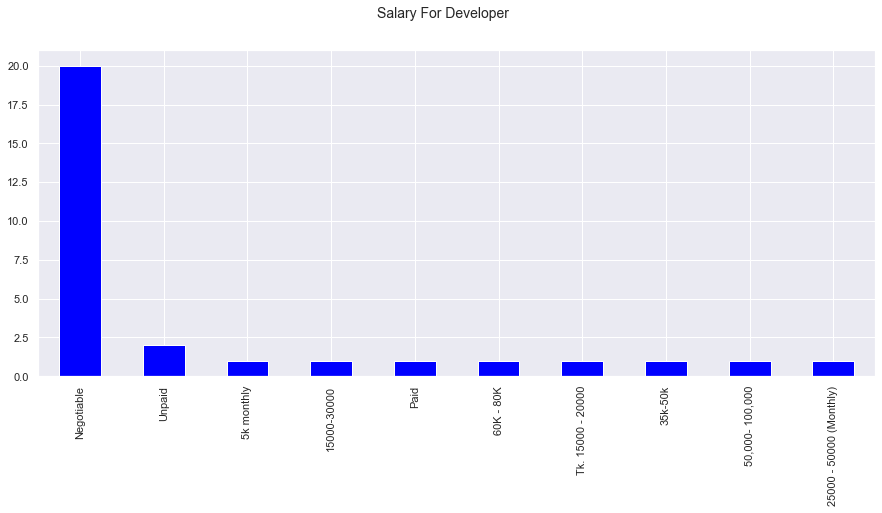

In [45]:
plt.figure(figsize=(15,6))

developer['job_salary'].value_counts().head(10).plot(kind='bar',color="blue")
plt.suptitle('Salary For Developer',fontsize=14)

Text(0.5, 0.98, 'Experience Require For Developer')

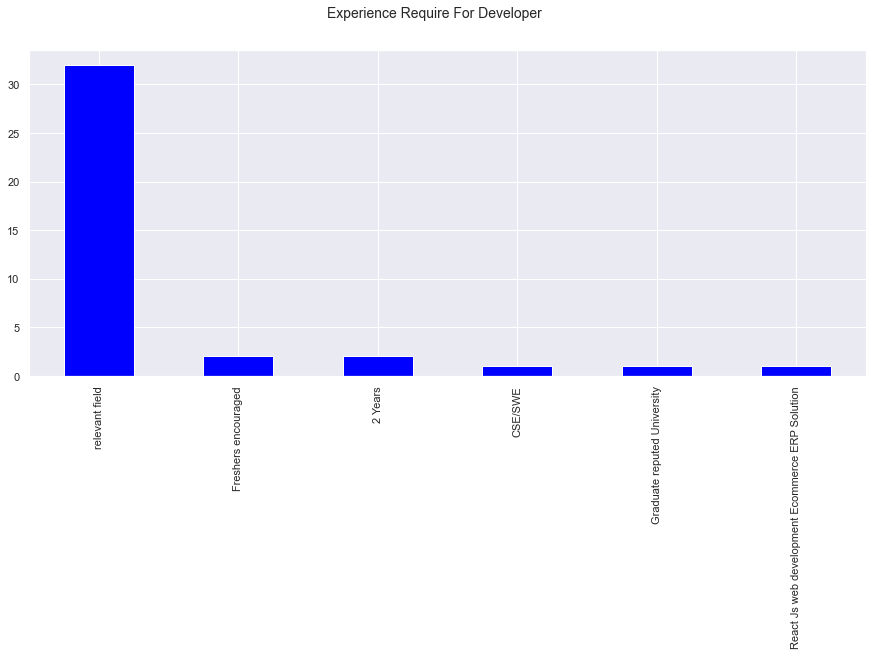

In [46]:
plt.figure(figsize=(15,6))

developer['plain_experience'].value_counts().head(10).plot(kind='bar',color='blue')
plt.suptitle('Experience Require For Developer',fontsize=14)

Text(0.5, 0.98, ' Developer job Location')

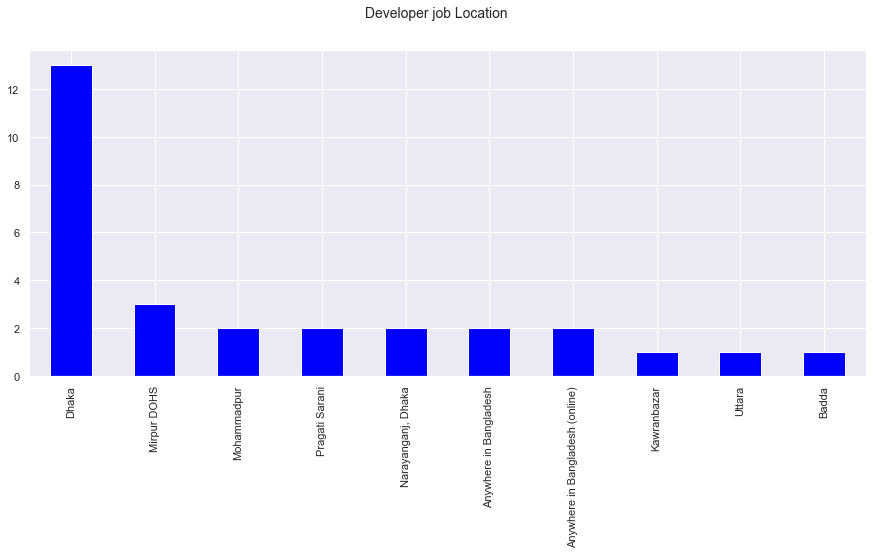

In [47]:
plt.figure(figsize=(15,6))

developer['job_location'].value_counts().head(10).plot(kind='bar' ,color="blue")
plt.suptitle(' Developer job Location',fontsize=14)

# Executive 

In [48]:
grp = df.groupby('category') 
Executive =grp.get_group('Executive')
Executive .head(10)

,job_title,company,job_location,job_skills,job_salary,category,plain_experience
42,Junior Executive (Purchase Department),CBL,"Zirabo, Asulia,",Students discipline Daffodil International University,11000/-,Executive,Smart honest
43,Executive Marketing,CJAd,"Bijoy Nagar, Dhaka","Smart , Hard Working , Communication Skill , Motivated . Challenge Taker",10K-15K,Executive,relevant field
46,Executive - Business Development,CodersTrust Bangladesh Ltd,Dhaka,"counseling , interpersonal , communications",Negotiable,Executive,relevant field
81,Executive/ Sr. Executive - Accounts,Doyel Development Properties Ltd,Dhaka,"English , Bengali languages",Negotiable,Executive,relevant field
82,Front Desk Executive (Female),Doyel Development Properties Ltd,Dhaka,Communication,Negotiable,Executive,Freshers encouraged
87,Executive - Industrial Engineering,Epyllion Group,Narayanganj,"Communication , Presentation",Negotiable,Executive,relevant field
100,Executive - Marketing (Building Products),Green Peak Holdings Ltd,Dhaka,"Corporate Sales , Direct Sales , Sales , Marketing",Negotiable,Executive,relevant field
110,"Collection Executive, Retail Business",IPDC Finance Limited,Dhaka,.,Negotiable,Executive,relevant field
117,Sr. Executive/ Asst. Manager (Sales),Iqbal & Brothers Limited,Dhaka,.,Negotiable,Executive,relevant field
129,Jr. Executive (Sales & Marketing - Real State),LILY,Anywhere in Bangladesh,"Business Development , Corporate Sales Marketing , Relationship Management .",15K,Executive,Graduate reputed University BBA Marketing


In [49]:
skills = ['Smart','Communication', 'Sales','Business', 'Marketing', 'Challenge',]

skill= dict((x,0) for x in skills)
for i in skill:
    x = Executive ['job_skills'].str.contains(i).sum()
    if i in skill:
        skill[i] = x
        
print(skill)

{'Smart': 4, 'Communication': 8, 'Sales': 2, 'Business': 1, 'Marketing': 2, 'Challenge': 4}


In [50]:
skill_requirement = sorted(skill.items(), key=lambda x: x[1], reverse=True)
skill = pd.DataFrame(skill_requirement,columns=['skill','Count'])
skill['Count'] = skill.Count.astype('int')
skill

,skill,Count
0,Communication,8
1,Smart,4
2,Challenge,4
3,Sales,2
4,Marketing,2
5,Business,1


Text(0.5, 0, 'Count')

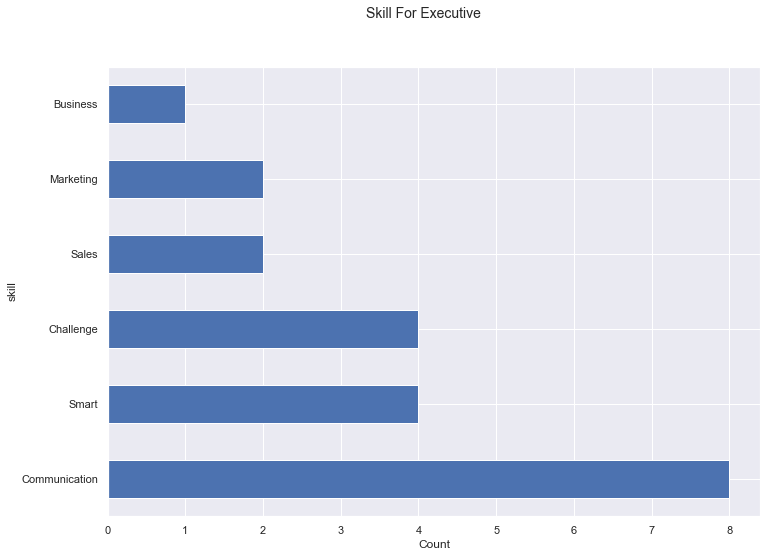

In [51]:
skill.plot.barh(x='skill',y='Count',legend=False,)
plt.suptitle('Skill For Executive',fontsize=14)
plt.xlabel('Count')

Text(0.5, 0.98, 'Salary For Executive')

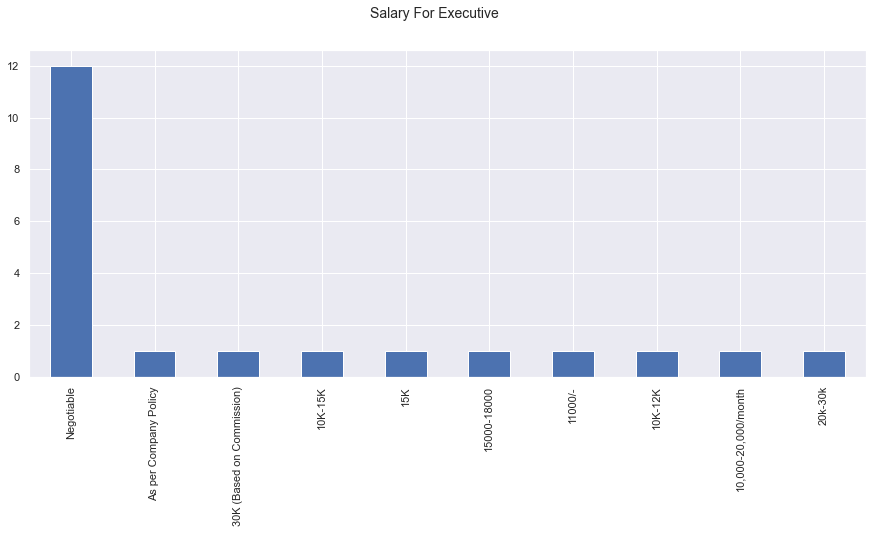

In [52]:
plt.figure(figsize=(15,6))

Executive['job_salary'].value_counts().head(10).plot(kind='bar')
plt.suptitle('Salary For Executive',fontsize=14)

Text(0.5, 0.98, 'Require Experience For Executive')

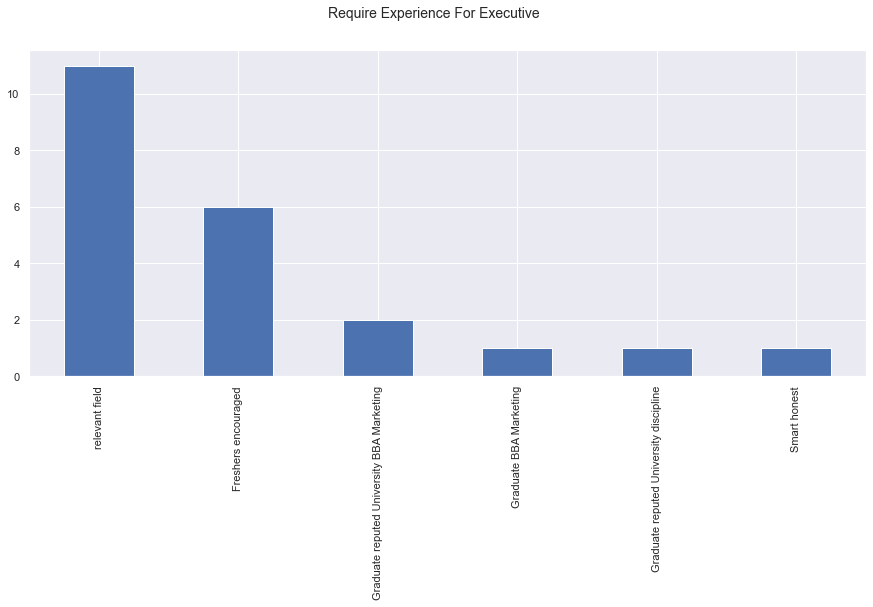

In [53]:
plt.figure(figsize=(15,6))

Executive['plain_experience'].value_counts().head(10).plot(kind='bar')
plt.suptitle('Require Experience For Executive',fontsize=14)

Text(0.5, 0.98, ' Executive Job Location')

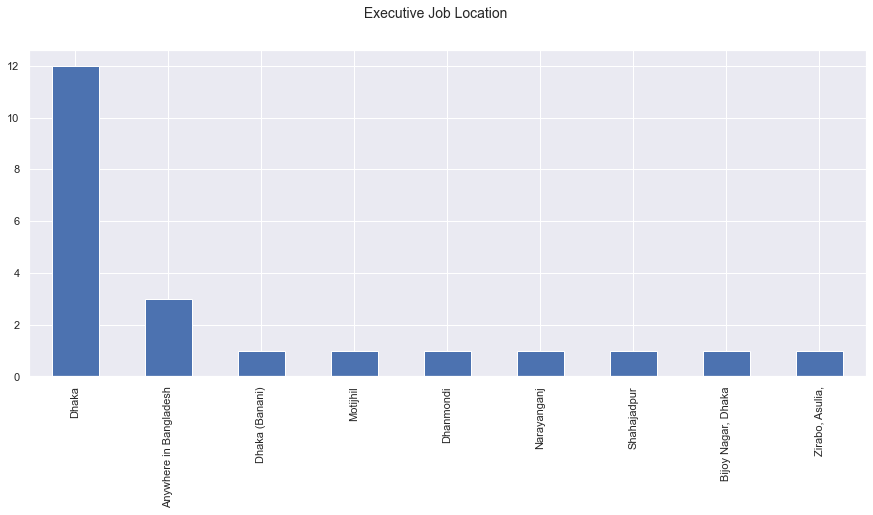

In [54]:
plt.figure(figsize=(15,6))

Executive['job_location'].value_counts().head(10).plot(kind='bar')
plt.suptitle(' Executive Job Location',fontsize=14)

# Manager

In [55]:
grp = df.groupby('category') 
Manager=grp.get_group('Manager')
Manager .head(10)

,job_title,company,job_location,job_skills,job_salary,category,plain_experience
17,"Manager (Digital Marketing), E-Commerce",Bangladesh Development Group,Anywhere in Bangladesh,"Digital , Social Media Operation , Advertisement , Marketing",Negotiable,Manager,relevant field
45,Manager -Sales & Marketing (Male),CJBL,Chittagong,"Smart , Hard Working , Communication Skill , Motivated . Challenge Taker",Negotiable,Manager,Experience Sales & Marketing . Battery factory experience people get advance preference
79,Project Manager,DOCEH,Dhaka,"Excellent written oral communication skills English , Project Management",As per Company Policy,Manager,"Successful project management , preferably within higher education hospitality environment"
89,Assistant Manager - Maintenance (Garments),Epyllion Group,Gazipur,"Communication , Presentation , technical",Negotiable,Manager,relevant field
96,Account Manager,Geeksntechnology,Dhaka,.,Negotiable,Manager,relevant field
105,Manager - Operational Risk,IPDC Finance Limited,Dhaka (Gulshan),.,Negotiable,Manager,relevant field
106,"Assistant Manager/ Manager - Channel Development, Retail Business",IPDC Finance Limited,Dhaka,"Interpersonal , .Negotiation , Leadership , communication",Negotiable,Manager,relevant field
107,"Sales Manager, Consumer White Goods Financing, Retail Business",IPDC Finance Limited,Dhaka,"Interpersonal , .Negotiation , Leadership , communication",Negotiable,Manager,relevant field
108,Branch Manager,IPDC Finance Limited,"Dhaka (Dhanmondi, Motijheel)",Communication,Negotiable,Manager,relevant field
109,Senior Relationship officer/ Junior Relationship Manager -Liability,IPDC Finance Limited,Dhaka,"Interpersonal , Negotiation , communication",Negotiable,Manager,relevant field


Text(0.5, 0, 'Count')

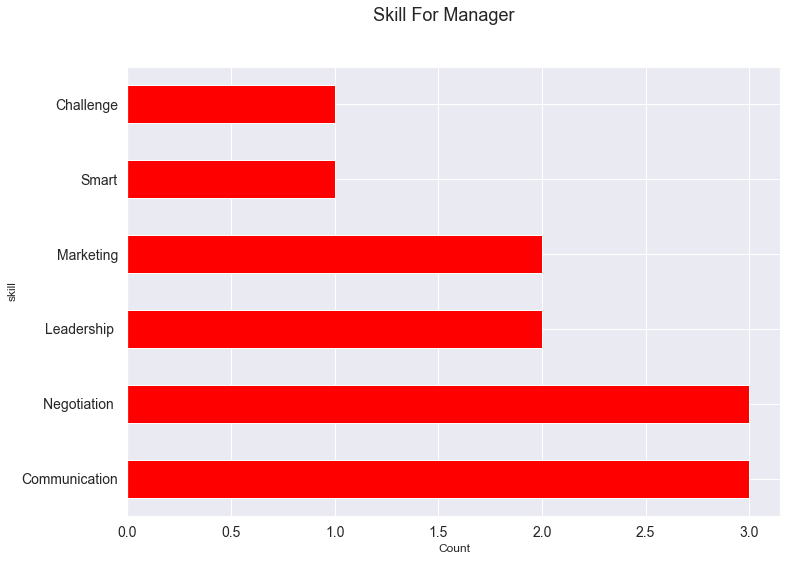

In [56]:
skills = ['Smart','Communication', 'Leadership ','Negotiation ', 'Marketing', 'Challenge',]

skill= dict((x,0) for x in skills)
for i in skill:
    x = Manager ['job_skills'].str.contains(i).sum()
    if i in skill:
        skill[i] = x
        
skill_requirement = sorted(skill.items(), key=lambda x: x[1], reverse=True)
skill = pd.DataFrame(skill_requirement,columns=['skill','Count'])
skill['Count'] = skill.Count.astype('int')

skill.plot.barh(x='skill',y='Count',color='red',legend=False,fontsize=14)
plt.suptitle('Skill For Manager',fontsize=18)
plt.xlabel('Count')

Text(0.5, 0.98, ' Salary for Manager')

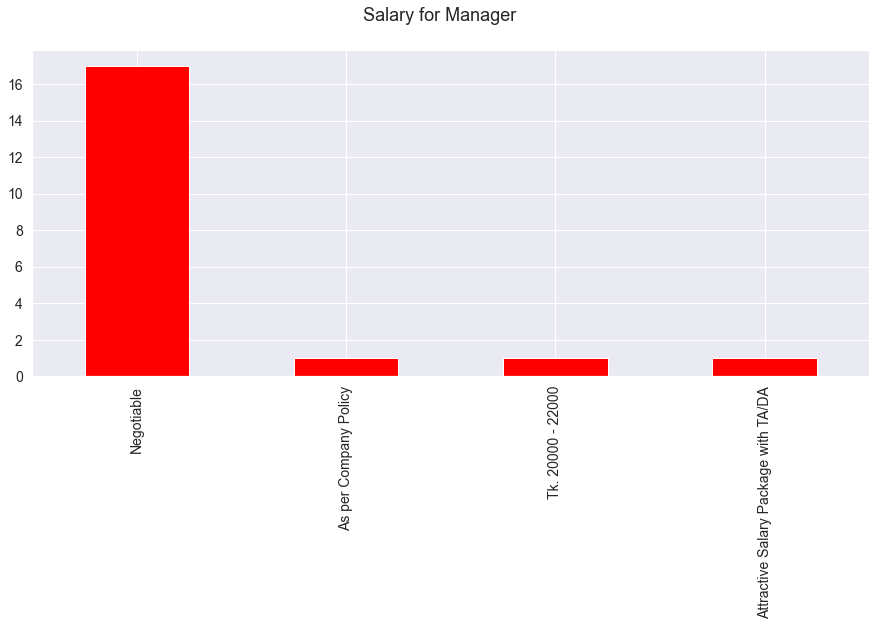

In [57]:
plt.figure(figsize=(15,6))

Manager['job_salary'].value_counts().head(10).plot(kind='bar',fontsize=14,color='red')
plt.suptitle(' Salary for Manager',fontsize=18)

Text(0.5, 0.98, ' Require Experience For Manager')

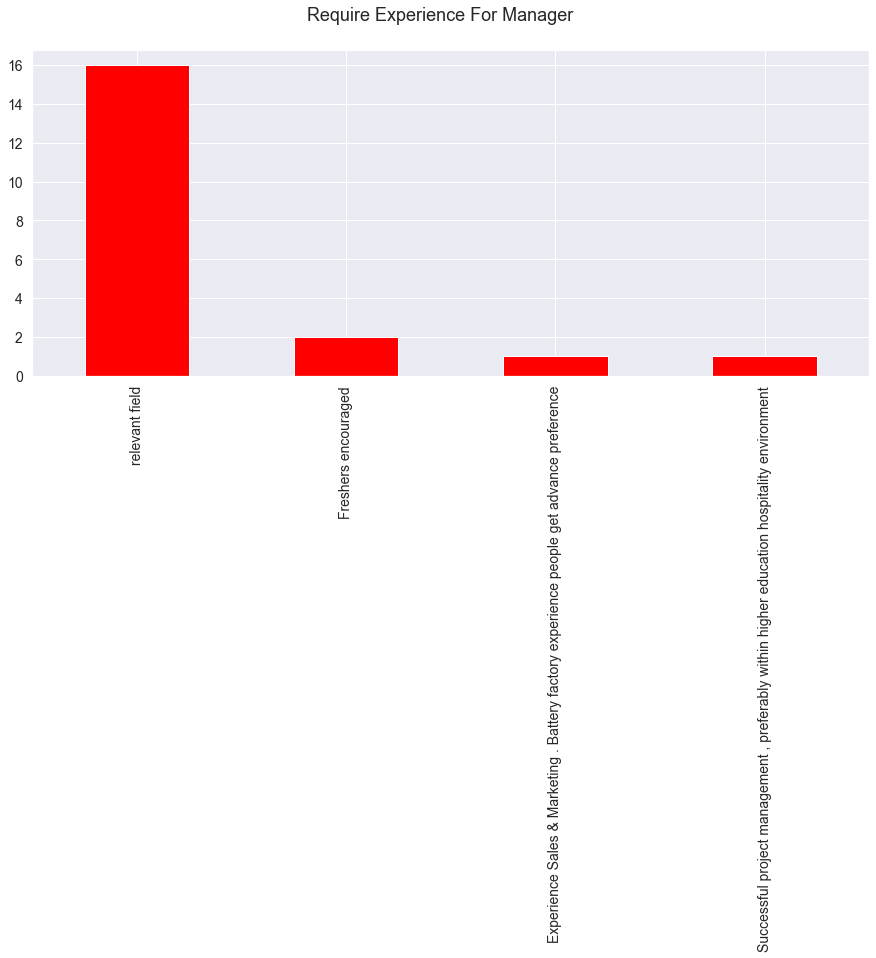

In [58]:
plt.figure(figsize=(15,6))

Manager['plain_experience'].value_counts().plot(kind='bar',fontsize=14,color='red')
plt.suptitle(' Require Experience For Manager',fontsize=18)

Text(0.5, 0.98, ' Manager Job Location')

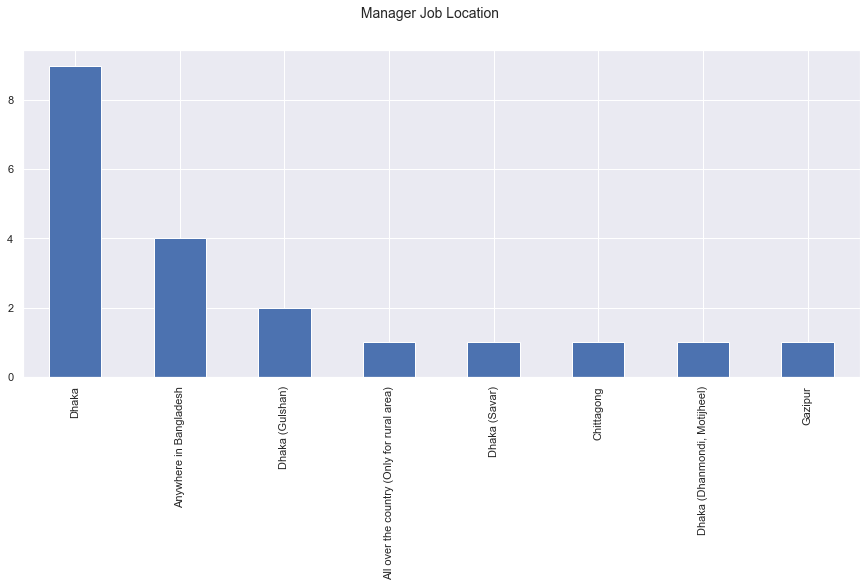

In [59]:
plt.figure(figsize=(15,6))

Manager['job_location'].value_counts().plot(kind='bar')
plt.suptitle(' Manager Job Location',fontsize=14)

# Engineer

In [60]:
grp = df.groupby('category') 
Engineer=grp.get_group('Engineer')
Engineer.head(10)

,job_title,company,job_location,job_skills,job_salary,category,plain_experience
11,Software Quality Assurance Engineer,appnap,Pragati Sarani,test tools,Negotiable,Engineer,relevant field
18,Project Engineer (Civil),Bangladesh Development Group,Dhaka,"communication , interpersonal , leadership",Negotiable,Engineer,relevant field
20,Software Engineer,Base,Mirpur 11,"PHP , MySQL , NodeJS , VueJS , React , Ajax , jQuery , JavaScript , HTML , CSS",30000 - 40000 (Monthly),Engineer,relevant field
26,Senior Software Engineer (C#),BJIT Ltd,Dhaka,".Net , C # , UWP , WCF , WPF",Negotiable,Engineer,relevant field
27,Senior ReactJS Engineer,BJIT,dhaka,React JS,Negotiable,Engineer,relevant field
33,J2EE Senior Software Engineer,BJIT,dhaka,"Java EE , HTML , CSS",Negotiable,Engineer,relevant field
48,Flutter Developer,Codeware Ltd,Dhaka (Adabor),"Dart , Flutter , Flutter UI",Negotiable,Engineer,relevant field
102,Software Engineer,Instalogic,Dhaka,Communication,Negotiable,Engineer,relevant field
134,Software Engineer - Quality Assurance,Millennium Information Solution Ltd,Dhaka,"Communication , Programming , impeccable organizational",Negotiable,Engineer,relevant field
174,QA Engineer,ReliSource,Dhaka,.,Negotiable,Engineer,relevant field


Text(0.5, 0, 'Count')

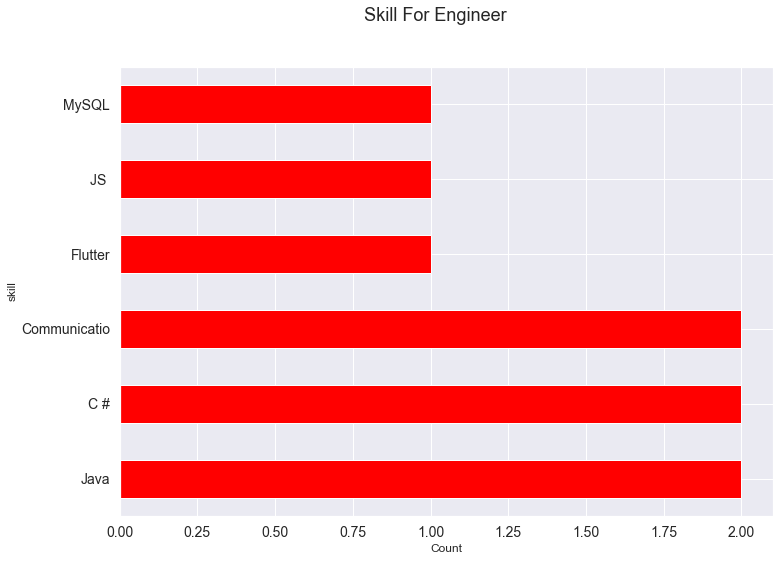

In [61]:
skills = ['Java','C #', 'Flutter','JS ', 'Communicatio', 'MySQL',]

skill= dict((x,0) for x in skills)
for i in skill:
    x = Engineer['job_skills'].str.contains(i).sum()
    if i in skill:
        skill[i] = x
        
skill_requirement = sorted(skill.items(), key=lambda x: x[1], reverse=True)
skill = pd.DataFrame(skill_requirement,columns=['skill','Count'])
skill['Count'] = skill.Count.astype('int')

skill.plot.barh(x='skill',y='Count',color='red',legend=False,fontsize=14)
plt.suptitle('Skill For Engineer',fontsize=18)
plt.xlabel('Count')

Text(0.5, 0.98, ' Salary for Engineer')

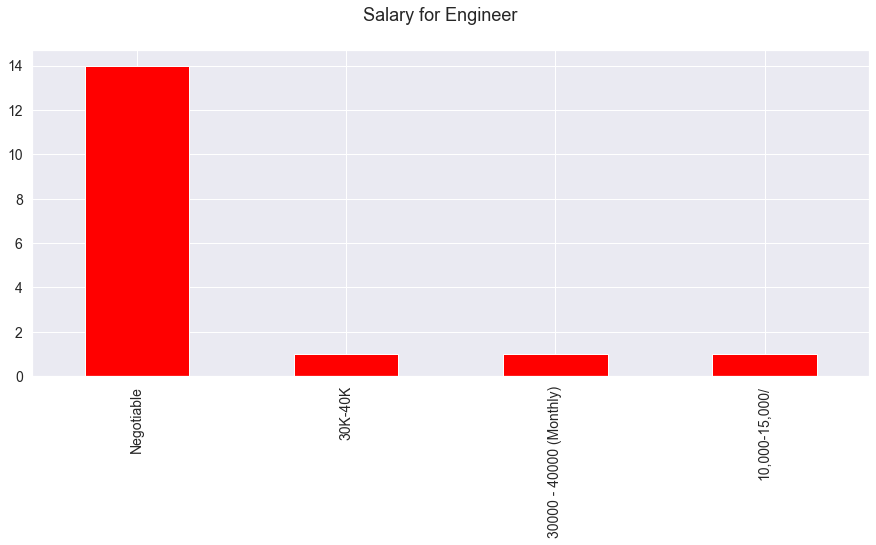

In [62]:
plt.figure(figsize=(15,6))

Engineer['job_salary'].value_counts().head(10).plot(kind='bar',fontsize=14,color='red')
plt.suptitle(' Salary for Engineer',fontsize=18)

Text(0.5, 0.98, ' Require Experience For Engineer')

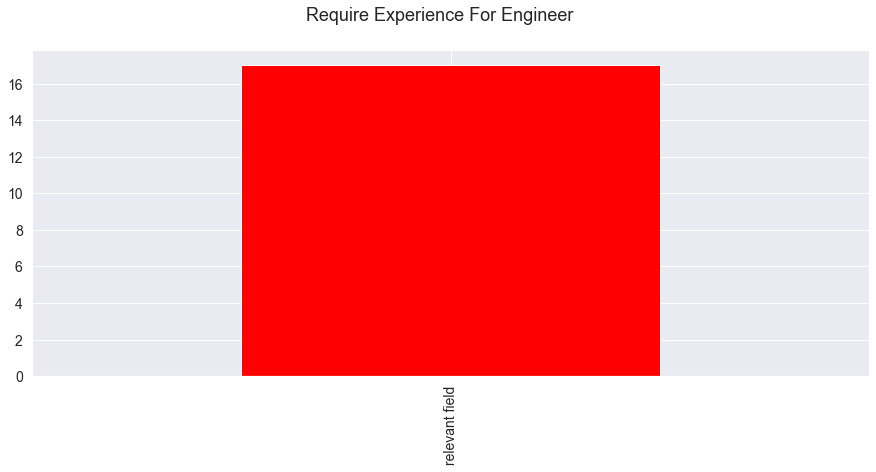

In [63]:
plt.figure(figsize=(15,6))

Engineer['plain_experience'].value_counts().plot(kind='bar',fontsize=14,color='red')
plt.suptitle(' Require Experience For Engineer',fontsize=18)

Text(0.5, 0.98, 'Engineer Job Location')

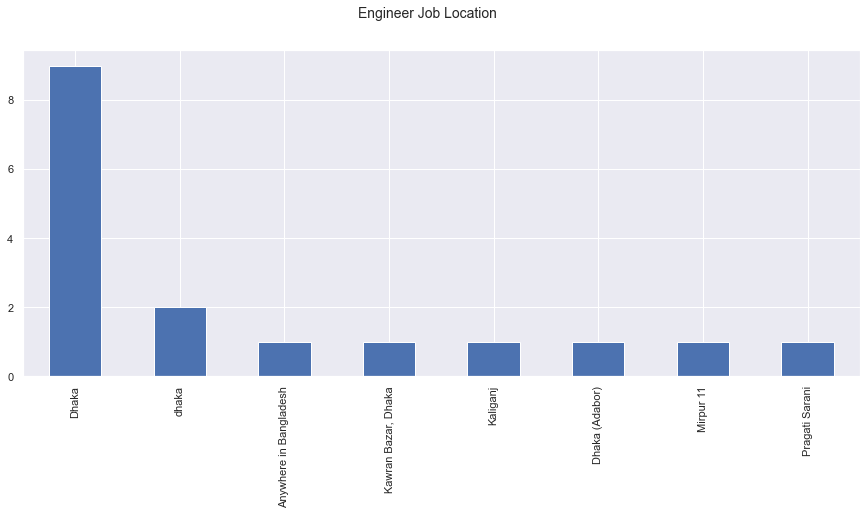

In [64]:
plt.figure(figsize=(15,6))

Engineer['job_location'].value_counts().plot(kind='bar')
plt.suptitle('Engineer Job Location',fontsize=14)

# Designer

In [65]:
grp = df.groupby('category') 
Designer=grp.get_group('Designer')
Designer.head(10)

,job_title,company,job_location,job_skills,job_salary,category,plain_experience
5,"Designer, Men's Wear, Design",aarong,Dhaka,"style , fashion , fabric , color technical aspects",Negotiable,Designer,relevant field
15,UI/UX Engineer-Intern,AyooJon,Dhaka,"Adobe Illustrator , Photoshop , Figma , Adobe Xd",Paid,Designer,.
30,Senior CAD Engineer/ Mechanical Designer,BJIT,Anywhere in Bangladesh,"CAD , Python , C # , Mechanical Systems",Negotiable,Designer,relevant field
50,Motion Graphics Designer & Video Content Creator,Coding,Lalmatia,"Graphic Design , motion graphics , video editing,2D 3D Motion , motion typography , Advertising Promotion",20000 - 30000 (Monthly),Designer,relevant field
121,"Designer, Intern",joom,Dhanmondi,Adobe Photoshop/ Illustrator,15000 (Monthly),Designer,relevant field
148,UI/UX Designer,orangetoolz,Anywhere in Bangladesh,"UI Design , UX Designer",30000 - 40000 (Monthly),Designer,relevant field
149,Senior Front-End Developer (ReactJS),Parallaxlogic,Shahajadpur,"Bootstrap , HTML5 , CSS3 , Less/SASS .",30000-40000,Designer,relevant field
161,Graphic Designer,Prionty Edit & Effects,"House 48, Road 11, Block C, Banani,Dhaka 1213","Adobe Illustrator , Adobe Photoshop , communication",Negotiable,Designer,relevant field
180,UI Developer,Renessa,Paltan,"C++ , CSS , HTML , Java , Laravel",Negotiable,Designer,relevant field
184,UI & UX Designer,Ringer,MuradPur,.,Negotiable,Designer,relevant field


Text(0.5, 0, 'Count')

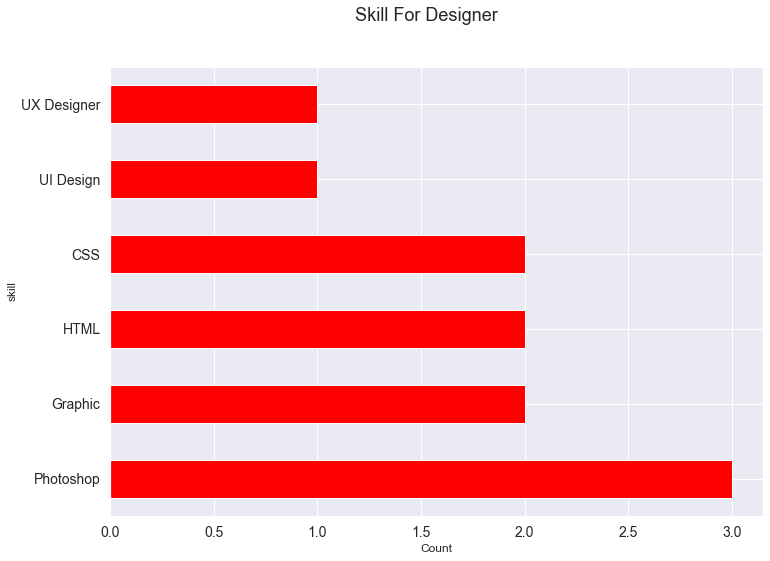

In [66]:
skills = ['Graphic','Photoshop', 'HTML','CSS', 'UI Design', 'UX Designer',]

skill= dict((x,0) for x in skills)
for i in skill:
    x = Designer['job_skills'].str.contains(i).sum()
    if i in skill:
        skill[i] = x
        
skill_requirement = sorted(skill.items(), key=lambda x: x[1], reverse=True)
skill = pd.DataFrame(skill_requirement,columns=['skill','Count'])
skill['Count'] = skill.Count.astype('int')

skill.plot.barh(x='skill',y='Count',color='red',legend=False,fontsize=14)
plt.suptitle('Skill For Designer',fontsize=18)
plt.xlabel('Count')

Text(0.5, 0.98, ' Salary for Designer')

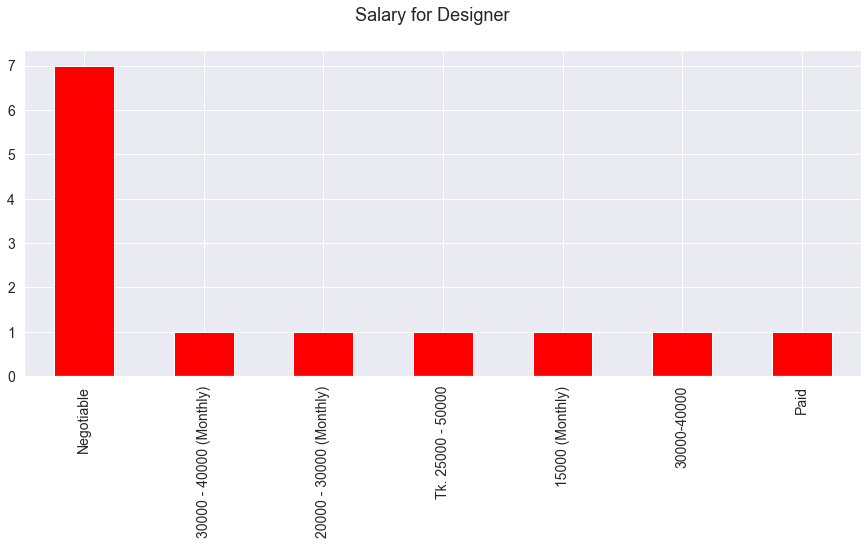

In [67]:
plt.figure(figsize=(15,6))

Designer['job_salary'].value_counts().head(10).plot(kind='bar',fontsize=14,color='red')
plt.suptitle(' Salary for Designer',fontsize=18)

Text(0.5, 0.98, ' Require Experience For Designer')

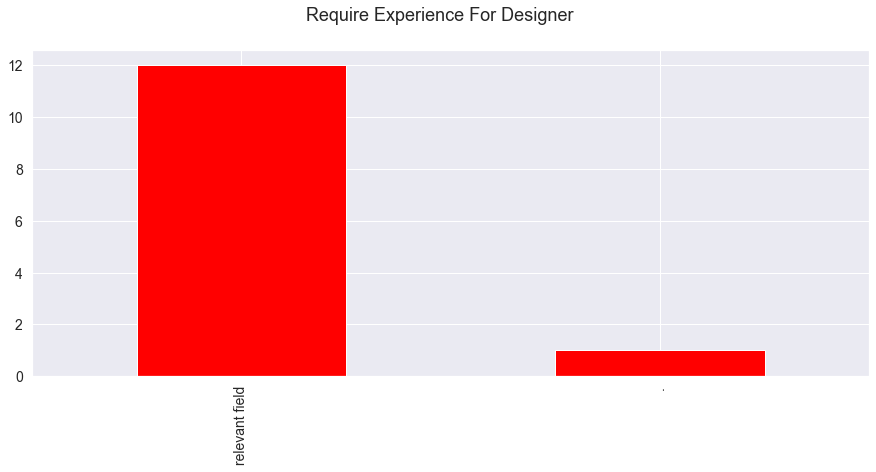

In [68]:
plt.figure(figsize=(15,6))

Designer['plain_experience'].value_counts().plot(kind='bar',fontsize=14,color='red')
plt.suptitle(' Require Experience For Designer',fontsize=18)

Text(0.5, 0.98, 'Designer Job Location')

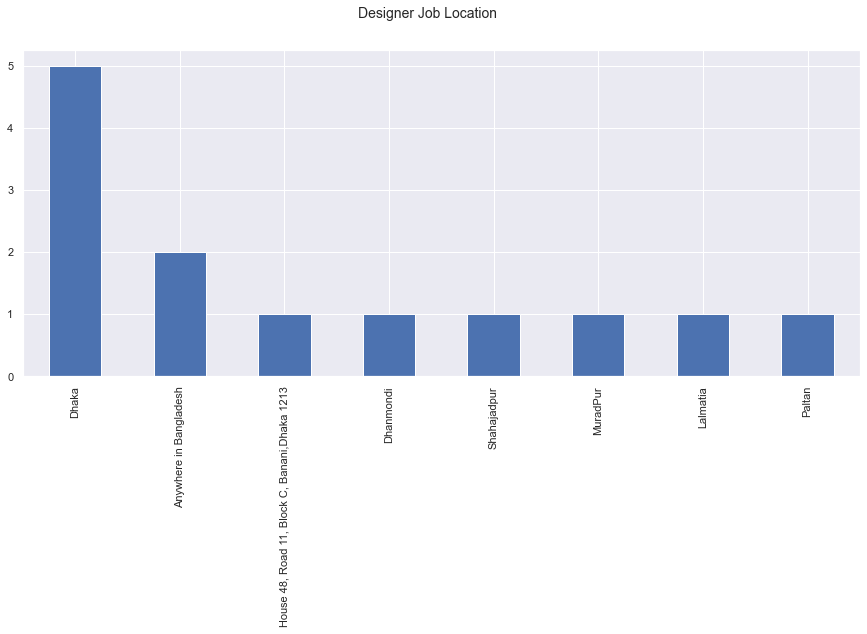

In [69]:
plt.figure(figsize=(15,6))

Designer['job_location'].value_counts().plot(kind='bar')
plt.suptitle('Designer Job Location',fontsize=14)

# Sales

In [70]:
grp = df.groupby('category') 
Sales=grp.get_group('Sales')
Sales.head(10)

,job_title,company,job_location,job_skills,job_salary,category,plain_experience
6,Sr. Sales Engineer,ACZET,Bangladesh,"Presentation Skills , Client Relationships , Emphasizing Excellence , Energy Level , Negotiation , Prospecting Skills , Meeting Sales Goals , Creativity , Sales Planning , Independence , Motivation Sales",40K-50K Monthly,Sales,relevant field
21,Sr. Sales and Marketing Officer.,Base,Mirpur 11,.,20000,Sales,relevant field
25,"Executive, Customer Support and Product Sourcing",BHL,Mirpur,"Smart , Hard Working , Communication Skill , Motivated . Challenge Taker",As per Company Policy,Sales,Freshers encouraged
44,Jr. Executive Sales & Admin(Female),CJBL,Ashulia,"Microsoft office , Organized Smart .",11000/-,Sales,Graduate reputed University Business
90,"Sales Officer, Corporate Sales (Consumer Electronics)",Esquire,Dhaka,.,"20,000/- 25,000/",Sales,Freshers encouraged
167,Sales Officer,RDT,Anywhere in Bangladesh (online),"Smart , Communication Skills , Marketing , Business Development",As per Company Policy,Sales,"Bachelor 's degree Business Administration , Business Management , Sales , Marketing , related field ."
170,Sales & Marketing Associate,Relisource,Dhaka,"IT , IT Enabled Services , BPO/Data Entry , Web Media/Blog , Sales , Marketing , Business Development , MS Word , MS Excel , MS PowerPoint , MS Outlook",Negotiable,Sales,relevant field
217,Trainee Area Sales Officer,T.K Group,Anywhere in Bangladesh,.,Negotiable,Sales,relevant field
218,"Officer, Sales MIS & Admin",T.K Group,Anywhere in Bangladesh,BBA/MBA ( Major MIS ),Negotiable,Sales,relevant field


Text(0.5, 0, 'Count')

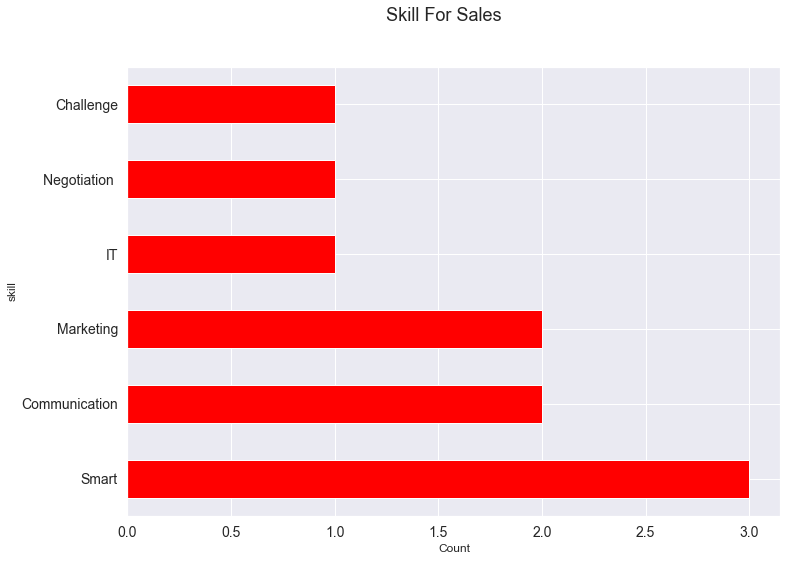

In [71]:
skills = ['Smart','Communication', 'IT','Negotiation ', 'Marketing', 'Challenge',]

skill= dict((x,0) for x in skills)
for i in skill:
    x = Sales['job_skills'].str.contains(i).sum()
    if i in skill:
        skill[i] = x
        
skill_requirement = sorted(skill.items(), key=lambda x: x[1], reverse=True)
skill = pd.DataFrame(skill_requirement,columns=['skill','Count'])
skill['Count'] = skill.Count.astype('int')

skill.plot.barh(x='skill',y='Count',color='red',legend=False,fontsize=14)
plt.suptitle('Skill For Sales',fontsize=18)
plt.xlabel('Count')

Text(0.5, 0.98, ' Salary for Sales')

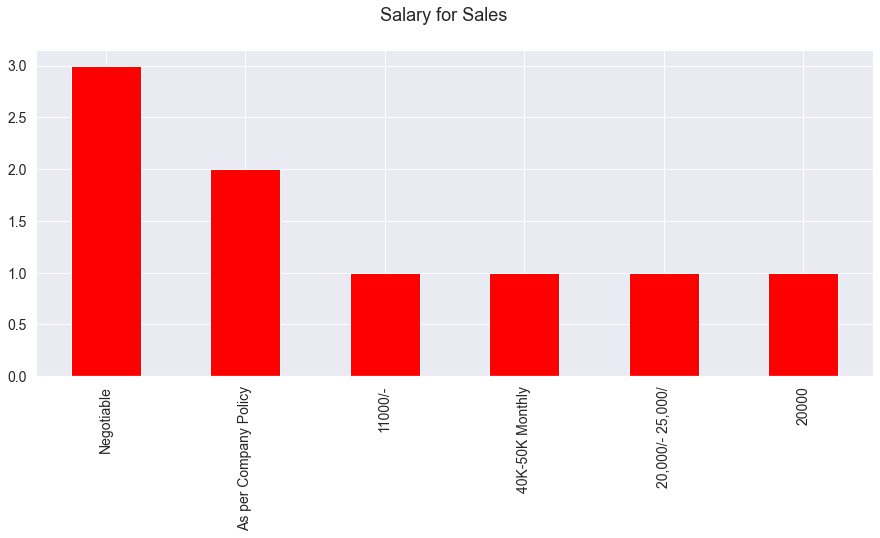

In [72]:
plt.figure(figsize=(15,6))

Sales['job_salary'].value_counts().head(10).plot(kind='bar',fontsize=14,color='red')
plt.suptitle(' Salary for Sales',fontsize=18)

Text(0.5, 0.98, ' Require Experience For Sales')

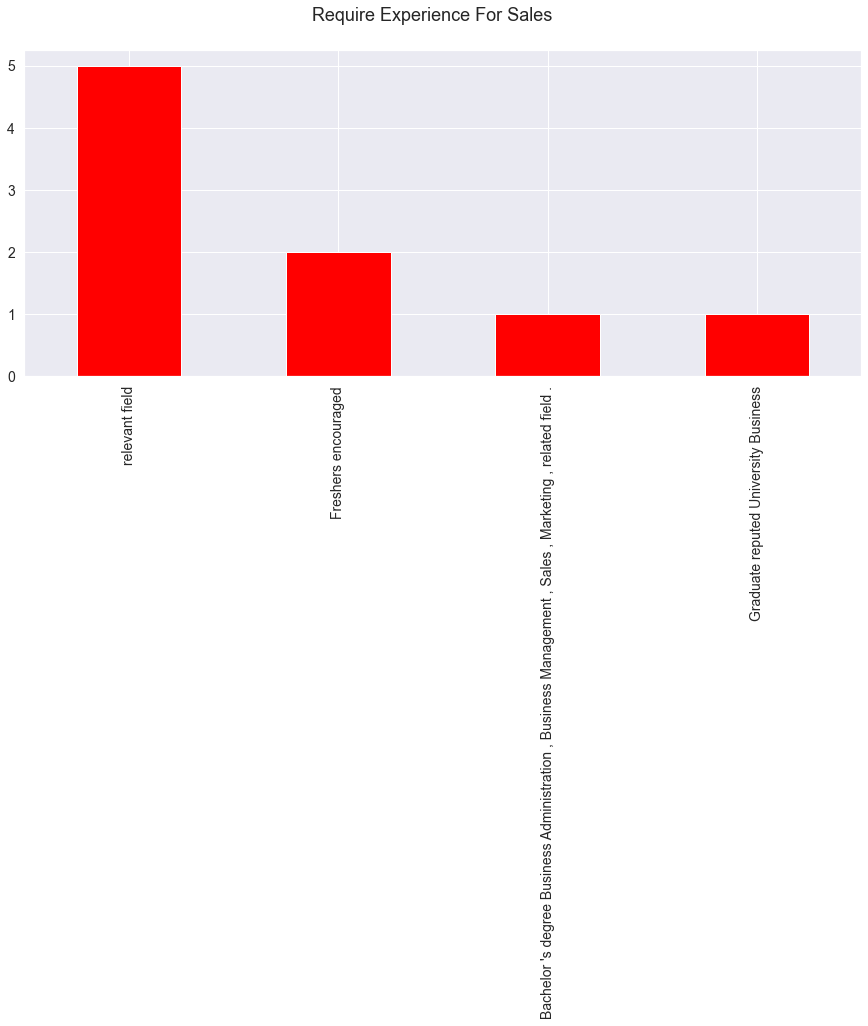

In [73]:
plt.figure(figsize=(15,6))

Sales['plain_experience'].value_counts().plot(kind='bar',fontsize=14,color='red')
plt.suptitle(' Require Experience For Sales',fontsize=18)

Text(0.5, 0.98, 'Sales Job Location')

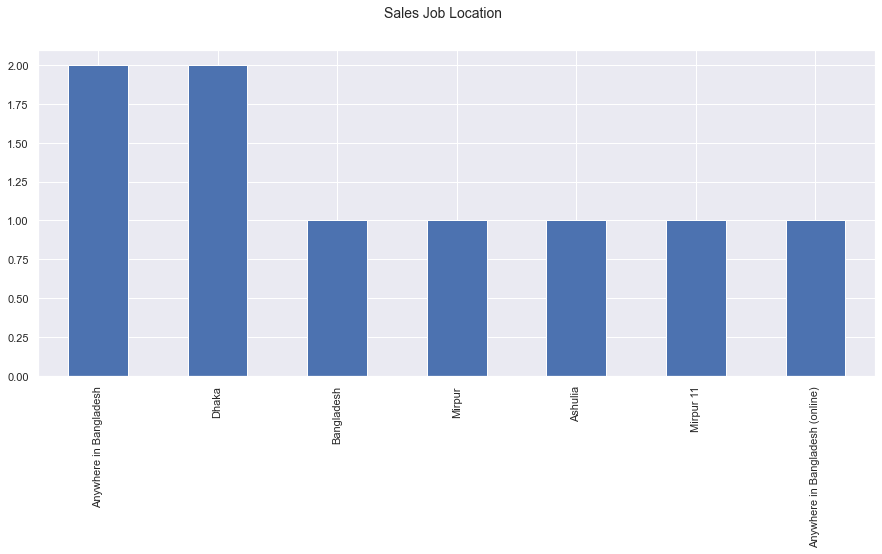

In [74]:
plt.figure(figsize=(15,6))

Sales['job_location'].value_counts().plot(kind='bar')
plt.suptitle('Sales Job Location',fontsize=14)

# Officer

In [75]:
grp = df.groupby('category') 
Officer=grp.get_group('Officer')
Officer.head(10)

,job_title,company,job_location,job_skills,job_salary,category,plain_experience
7,Probationary Officer(Cash),Aibl,Dhaka,.,Not Mentioned,Officer,.
24,CHIEF OPERATING OFFICER,BD Financer,Dhaka,.,Negotiable,Officer,relevant field
34,Logistic Officer,Blessing Group,Dhaka,Communication,Negotiable,Officer,relevant field
73,Junior Officer,daraz,Anywhere in Bangladesh,.,Negotiable,Officer,relevant field
145,FIELD OFFICER (Nos.100-200),NRBC,All over the country (Only for rural area),.,15000-23000,Officer,relevant field
191,Officer (VAT),Scube,Dhanmondi,"Accounting , VAT",Negotiable,Officer,Accounting VAT
216,"Officer/ Sr. Officer, QA&QC",T.K Group,Anywhere in Bangladesh,.,Negotiable,Officer,relevant field


Text(0.5, 0, 'Count')

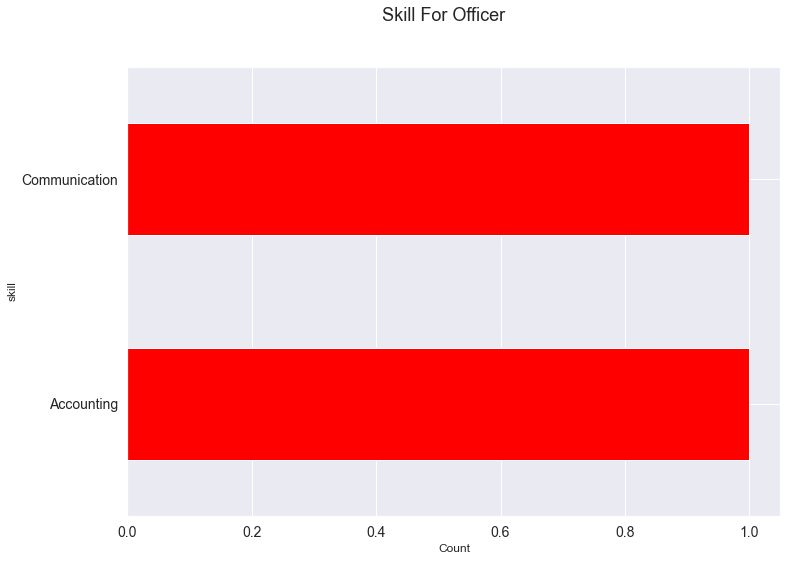

In [76]:
skills = ['Accounting','Communication',]

skill= dict((x,0) for x in skills)
for i in skill:
    x = Officer['job_skills'].str.contains(i).sum()
    if i in skill:
        skill[i] = x
        
skill_requirement = sorted(skill.items(), key=lambda x: x[1], reverse=True)
skill = pd.DataFrame(skill_requirement,columns=['skill','Count'])
skill['Count'] = skill.Count.astype('int')

skill.plot.barh(x='skill',y='Count',color='red',legend=False,fontsize=14)
plt.suptitle('Skill For Officer',fontsize=18)
plt.xlabel('Count')

Text(0.5, 0.98, ' Salary for Officer')

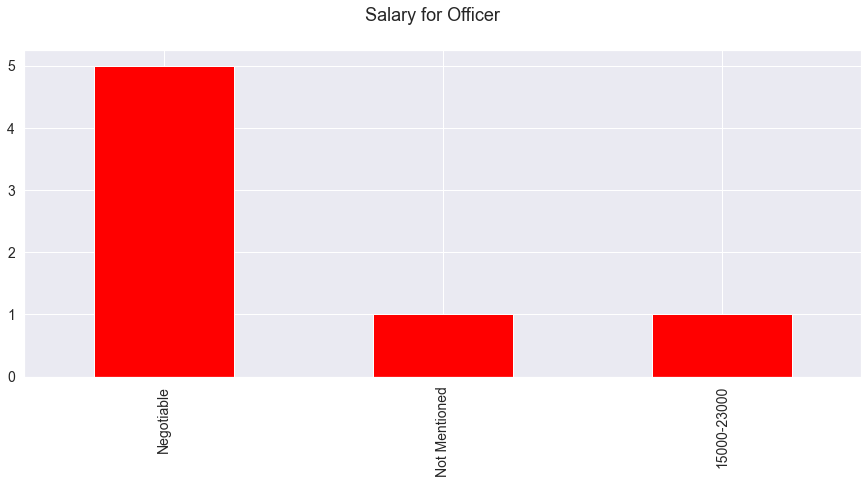

In [77]:
plt.figure(figsize=(15,6))

Officer['job_salary'].value_counts().head(10).plot(kind='bar',fontsize=14,color='red')
plt.suptitle(' Salary for Officer',fontsize=18)

Text(0.5, 0.98, ' Require Experience For Officer')

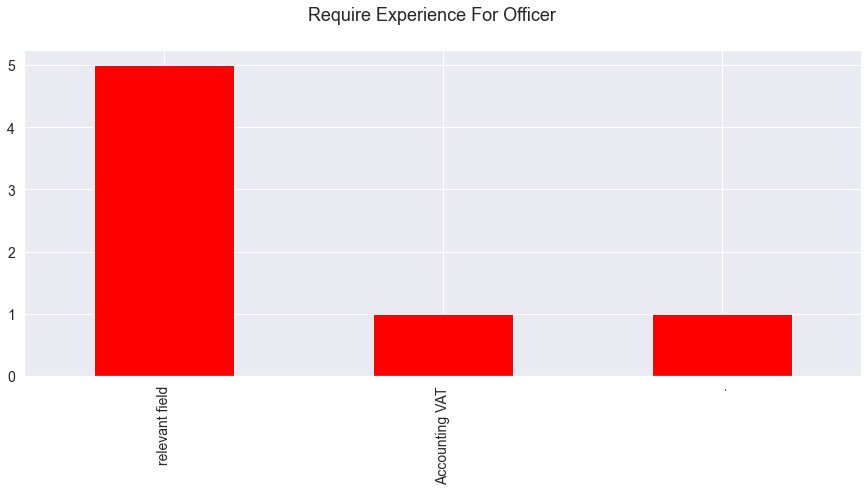

In [78]:
plt.figure(figsize=(15,6))

Officer['plain_experience'].value_counts().plot(kind='bar',fontsize=14,color='red')
plt.suptitle(' Require Experience For Officer',fontsize=18)

Text(0.5, 0.98, 'Officer Job Location')

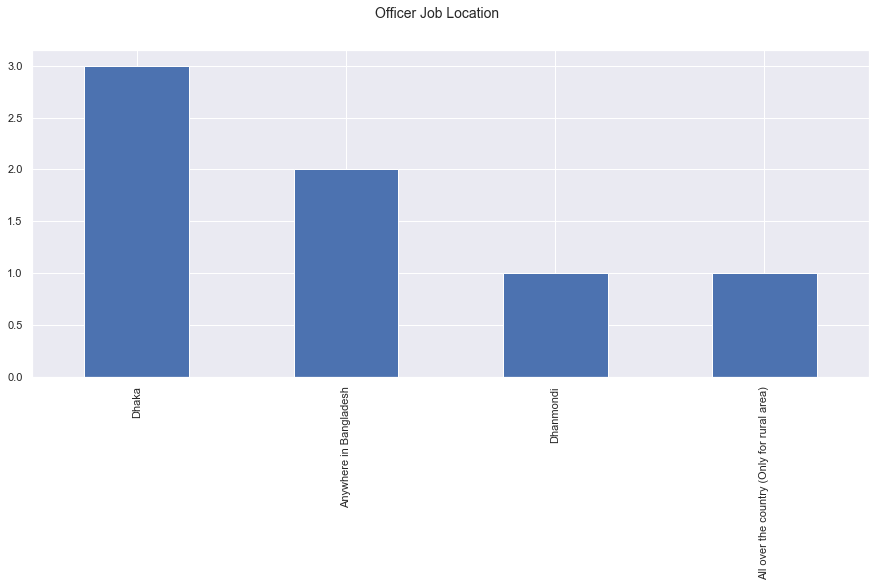

In [79]:
plt.figure(figsize=(15,6))

Officer['job_location'].value_counts().plot(kind='bar')
plt.suptitle('Officer Job Location',fontsize=14)

# Marketing

In [80]:
grp = df.groupby('category') 
Marketing=grp.get_group('Marketing')
Marketing.head(10)

,job_title,company,job_location,job_skills,job_salary,category,plain_experience
52,Digital Marketing Specialist & Graphic Designer,Creativeitem,Mirpur,"Adobe Premier , Adove After Effect , facebook ads , HTML CSS , Illustrator , Photoshop , SEO Digital Marketing",30000 - 40000 (Monthly),Marketing,relevant field
55,Multi-level marketer,cure,Work from home allowed but must live in Dhaka,.,Negotiable,Marketing,relevant field
80,Digital Marketing (Content Writer),Dolphin,Dhaka,"Digital Marketing , Content Writing",As per Company Policy,Marketing,Graduate reputed University
126,Paid Advertising Expert.,Lemon,Mirpur DOHS,.,"40,000 - 50,000",Marketing,relevant field
136,Digital Marketer,Moku,Anywhere in Bangladesh (online),"Smart , Self Motivated . Challenge Taker",15K-20K,Marketing,relevant field
196,Executive - Digital Advertising Operations,ServicEngine,Mohakhali,.,12000 - 15000 (Monthly),Marketing,Freshers encouraged


Text(0.5, 0, 'Count')

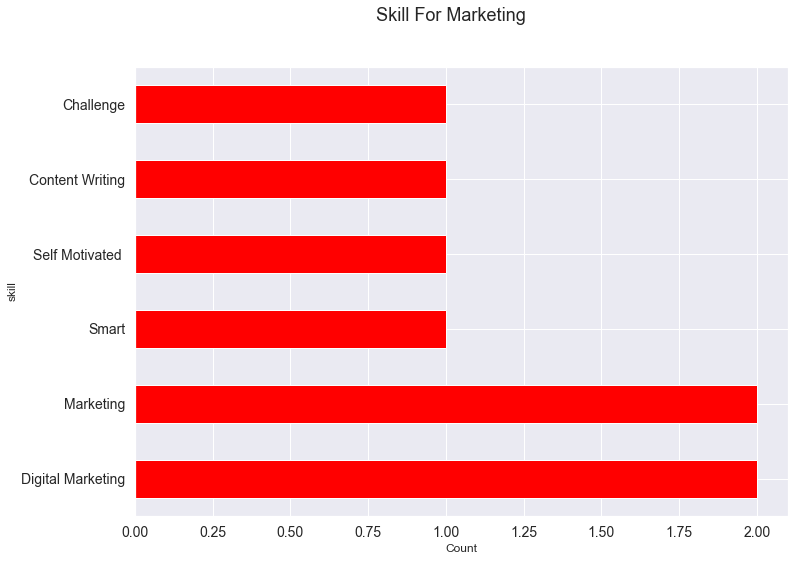

In [81]:
skills = ['Smart','Self Motivated ', 'Content Writing','Digital Marketing', 'Marketing', 'Challenge',]

skill= dict((x,0) for x in skills)
for i in skill:
    x = Marketing['job_skills'].str.contains(i).sum()
    if i in skill:
        skill[i] = x
        
skill_requirement = sorted(skill.items(), key=lambda x: x[1], reverse=True)
skill = pd.DataFrame(skill_requirement,columns=['skill','Count'])
skill['Count'] = skill.Count.astype('int')

skill.plot.barh(x='skill',y='Count',color='red',legend=False,fontsize=14)
plt.suptitle('Skill For Marketing',fontsize=18)
plt.xlabel('Count')

Text(0.5, 0.98, ' Salary For Marketing')

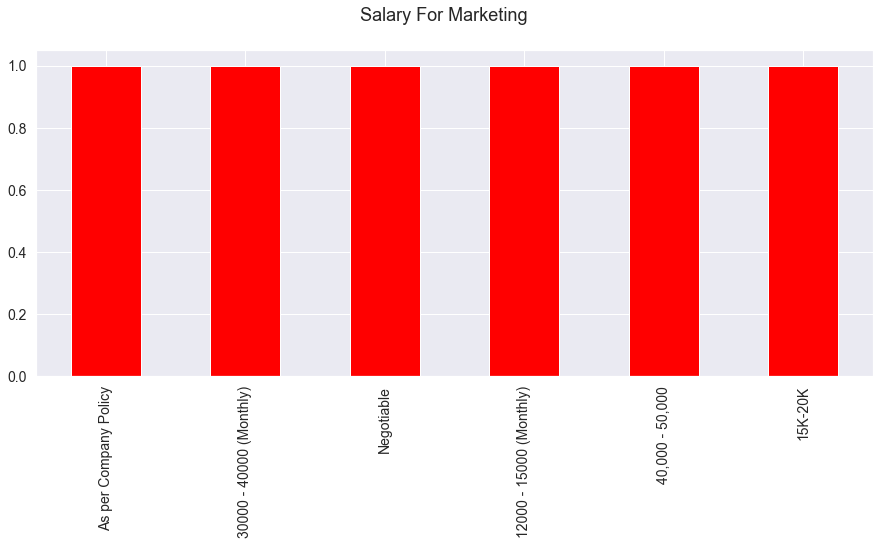

In [82]:
plt.figure(figsize=(15,6))

Marketing['job_salary'].value_counts().head(10).plot(kind='bar',fontsize=14,color='red')
plt.suptitle(' Salary For Marketing',fontsize=18)

Text(0.5, 0.98, ' Require Experience For Marketing')

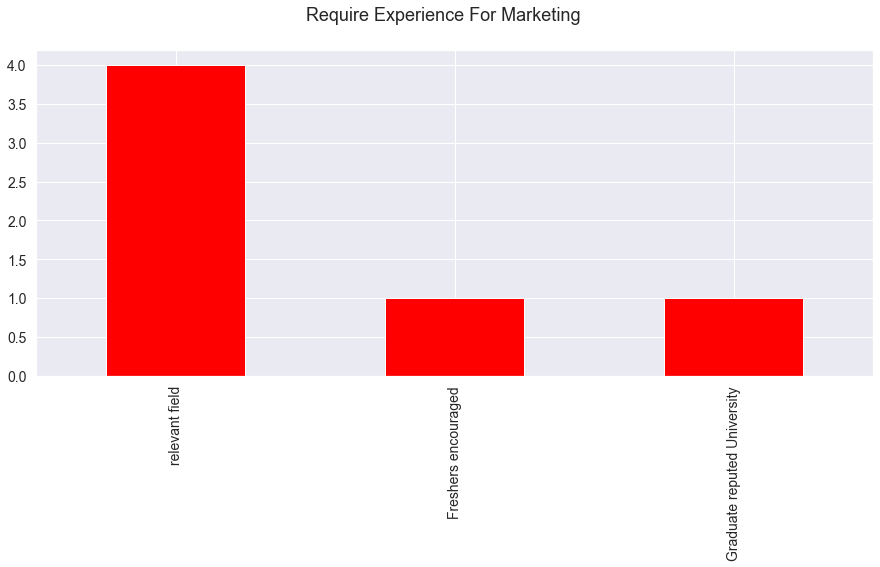

In [83]:
plt.figure(figsize=(15,6))

Marketing['plain_experience'].value_counts().plot(kind='bar',fontsize=14,color='red')
plt.suptitle(' Require Experience For Marketing',fontsize=18)

Text(0.5, 0.98, 'MarketingJob Location')

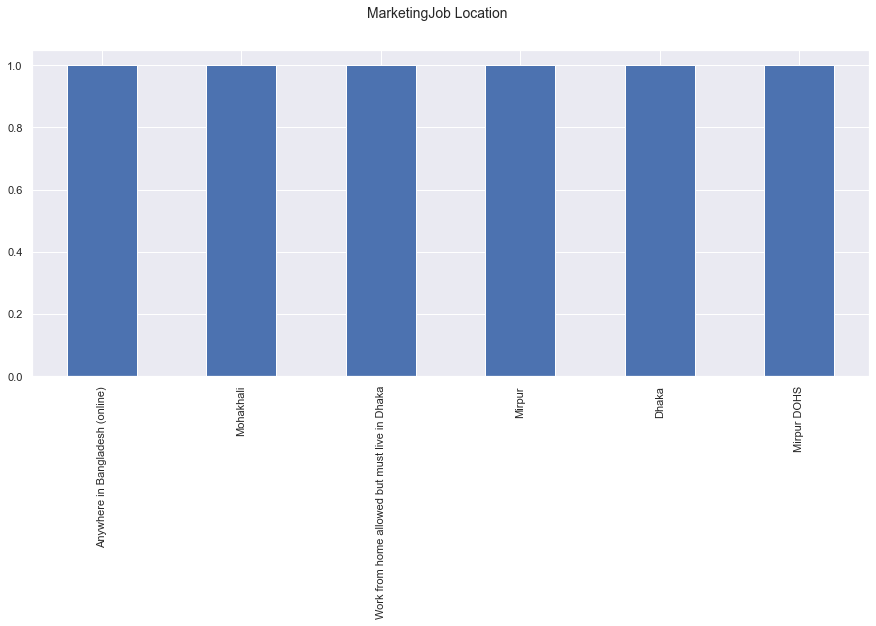

In [84]:
plt.figure(figsize=(15,6))

Marketing['job_location'].value_counts().plot(kind='bar')
plt.suptitle('MarketingJob Location',fontsize=14)

# HR

In [85]:
grp = df.groupby('category') 
HR=grp.get_group('HR')
HR.head(10)

,job_title,company,job_location,job_skills,job_salary,category,plain_experience
99,"Assistant Manager - Compliance, HR & Admin",Golden Son Limited,Chittagong,Communication,Negotiable,HR,relevant field
103,Officer - HR & Admin,Instalogic,Dhaka,"Communication , management , good",Negotiable,HR,relevant field
123,"Manager, Human Resources",Labaid Hospital,Dhaka,.,Negotiable,HR,relevant field
158,MTO - Human Resource,Pride Group,Dhaka (Savar),"communication , interpersonal",Negotiable,HR,relevant field
165,"Head of HR, Admin & Compliance",Purbani,Anywhere in Bangladesh,HRM,Negotiable,HR,relevant field


Text(0.5, 0, 'Count')

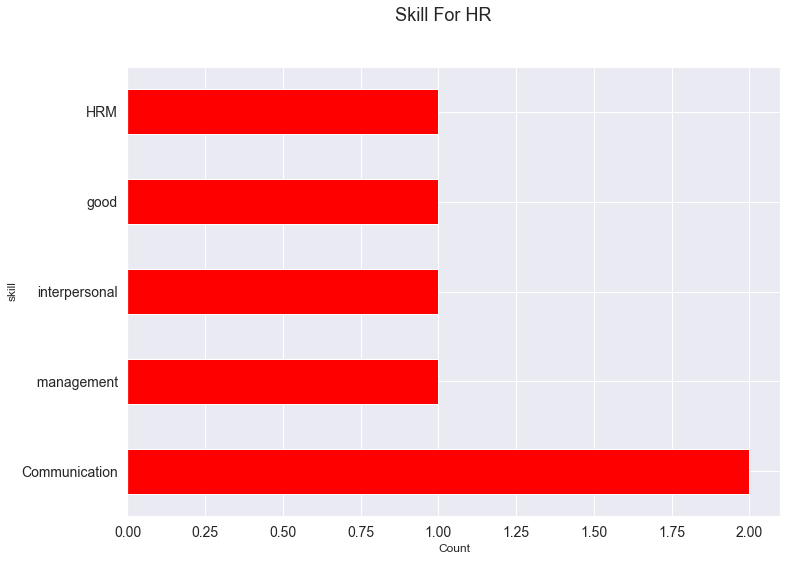

In [86]:
skills = [' management','Communication', 'interpersonal','good', 'HRM',]

skill= dict((x,0) for x in skills)
for i in skill:
    x = HR['job_skills'].str.contains(i).sum()
    if i in skill:
        skill[i] = x
        
skill_requirement = sorted(skill.items(), key=lambda x: x[1], reverse=True)
skill = pd.DataFrame(skill_requirement,columns=['skill','Count'])
skill['Count'] = skill.Count.astype('int')

skill.plot.barh(x='skill',y='Count',color='red',legend=False,fontsize=14)
plt.suptitle('Skill For HR',fontsize=18)
plt.xlabel('Count')

Text(0.5, 0.98, ' Salary For HR')

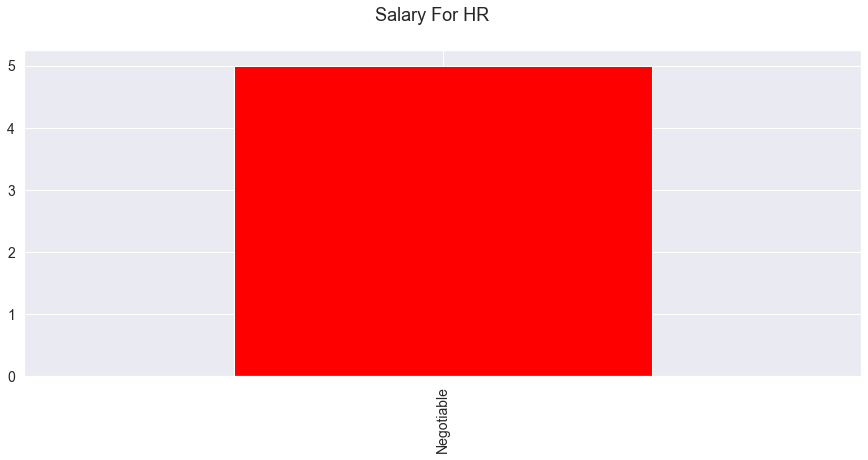

In [87]:
plt.figure(figsize=(15,6))

HR['job_salary'].value_counts().head(10).plot(kind='bar',fontsize=14,color='red')
plt.suptitle(' Salary For HR',fontsize=18)

Text(0.5, 0.98, ' Require Experience For HR')

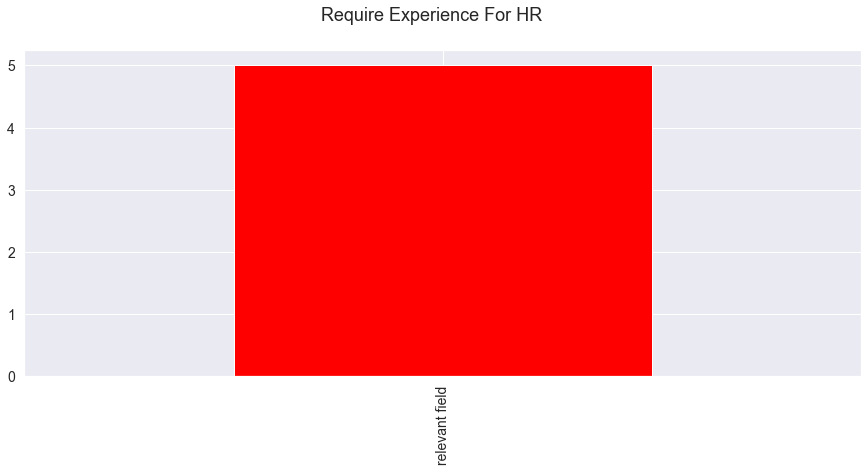

In [88]:
plt.figure(figsize=(15,6))

HR['plain_experience'].value_counts().plot(kind='bar',fontsize=14,color='red')
plt.suptitle(' Require Experience For HR',fontsize=18)

Text(0.5, 0.98, 'HR Job Location')

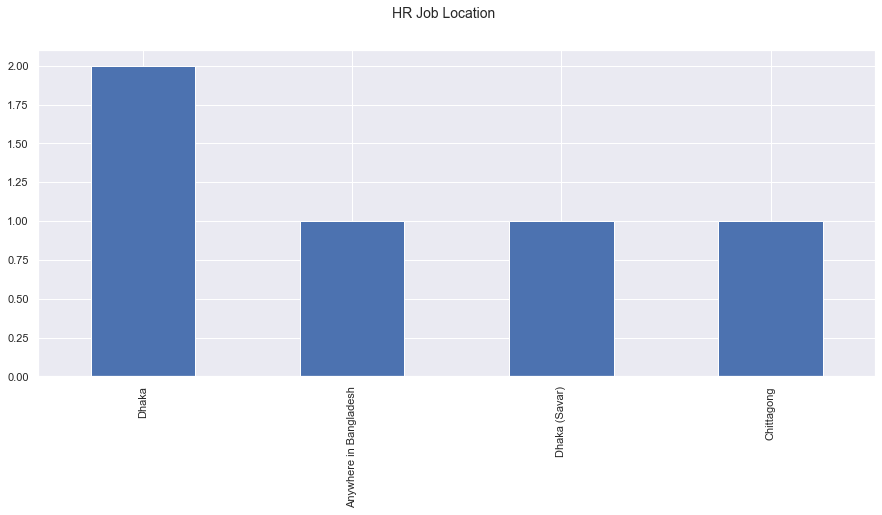

In [89]:
plt.figure(figsize=(15,6))

HR['job_location'].value_counts().plot(kind='bar')
plt.suptitle('HR Job Location',fontsize=14)